# Unsupervised approach to identifying important anatomical structures
**Author:** Scott Campit

The objective of this code is to get around the involved process of labeling images for ConvNet training. The overarching goal for this project is to train a deep neural network to accurately and robustly identify anatomical structures during surgery. 

A secondary (and more ambitious) goal is to predict whether or not there are structures where the surgeon is cutting, getting at temporal and spatial problem as well.

# Import libraries

In [9]:
import keras
from keras import layers
import numpy as np
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import random
%matplotlib inline

# Set an autoencoder
Now we'll create a simple autoencoder. This will probably fail, but we'll try to upgrade ASAP.

In [4]:
# The fully connected autoencoder.
encoding_dim = 32
input_img = keras.Input(shape=(784, ))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

# Let's also create a separate encoder/decoder model
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# View a snapshot of the images
Let's now pull some random images from our data folder.

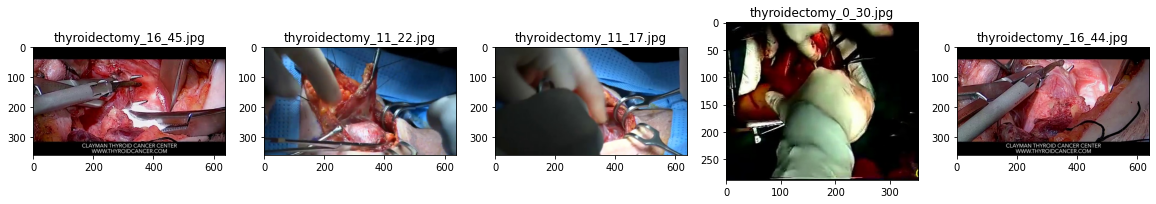

In [11]:
folder_path = r'D:/Data/InterOp/Thyroidectomy'
plt.figure(figsize=(20,20))

for i in range(5):
    file = random.choice(os.listdir(folder_path))
    image_path = os.path.join(folder_path, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# Standardize the image dataset
Now we need to perform some image preprocessing, including:

  1. Resize the image to the correct dimension
  2. Convert the image file to a color format
  3. Convert the image to a numpy array with float32 data type
  4. Normalize the image array to have values scaled between 0 and 1 from 0 to 255.


In [ ]:
def create_imgdb(img_path):
    data = []

    for file in os.listdir(img_path):
        tmp = os.path.join(img_path, file)
        img = cv2.imread(tmp, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_height, img_width), interpolation=cv2.INTER_AREA)
        img = np.array(img).astype('float32')
        img /= 255
        data.append(img)
    return(data)